In [1]:
import numpy as np
import matplotlib.pyplot as plt
euroc_data = ['MH_01_easy', 'MH_02_easy', 'MH_03_medium', 'MH_04_difficult', 'MH_05_difficult', 
        'V1_01_easy', 'V1_02_medium', 'V1_03_difficult', 'V2_01_easy', 'V2_02_medium', 'V2_03_difficult']
euroc_data_title = ['MH_01', 'MH_02', 'MH_03', 'MH_04', 'MH_05',
                   'V1_01', 'V1_02', 'V1_03', 'V2_01', 'V2_02', 'V2_03']

# Calculate error and plot results

In [2]:
epoch_num = 10
euroc_vo_result_table = np.zeros((len(euroc_data), epoch_num))
euroc_pgo_result_table = np.zeros((len(euroc_data), epoch_num))

# Load Data

In [3]:
# Load the saved arrays from the file
import numpy as np
import matplotlib.pyplot as plt
import pickle

train_portion=1
loss_weight='(4,0.1,2,0.1)'
lr = '3e-6'
# exp_type = 'mono'
exp_type = 'stereo'


prefix = f'euroc_result_tables_1Ra_0.1ta_delayOptm_lr={lr}_{loss_weight}_p{train_portion}_{exp_type}'

print(f'{prefix}')

euroc_result_tables_1Ra_0.1ta_delayOptm_lr=3e-6_(4,0.1,2,0.1)_p1_stereo


In [4]:
loaded_data = np.load(f'results_{prefix}.npz')

euroc_vo_result_table = loaded_data['euroc_vo_result_table']
euroc_pgo_result_table = loaded_data['euroc_pgo_result_table']

with open(f'trajectories_{prefix}.pkl', 'rb') as file:
    trajectories_data = pickle.load(file)

In [5]:
end_epoch = 7

# print whole table

In [6]:
# Load the saved arrays from the file
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
train_portion=1

# loss_weight='(3,0.1,1,0.1)'
# lr = '1e-6'
loss_weight='(4,0.1,2,0.1)'
lr = '3e-6'

for exp_type in ['mono', 'stereo']:
    for train_portion in [0.25, 0.5, 1]:
        prefix = f'euroc_result_tables_1Ra_0.1ta_delayOptm_lr={lr}_{loss_weight}_p{train_portion}_{exp_type}'

        try:
            loaded_data = np.load(f'results_{prefix}.npz')

            euroc_vo_result_table = loaded_data['euroc_vo_result_table']
            euroc_pgo_result_table = loaded_data['euroc_pgo_result_table']

            with open(f'trajectories_{prefix}.pkl', 'rb') as file:
                trajectories_data = pickle.load(file)


            output_table = []
 
            items = [f'Ours {exp_type} VO (initial)', f'Ours {exp_type} VO (final)', f'Ours {exp_type} PGO (initial)', f'Ours {exp_type} PGO (final)']

            output_table.append(euroc_vo_result_table[:,0].tolist())
            output_table.append(euroc_vo_result_table[:,end_epoch].tolist())
            output_table.append(euroc_pgo_result_table[:,0].tolist())
            output_table.append(euroc_pgo_result_table[:,end_epoch].tolist())

            # Add 'items' as the first column in 'data'
            output_table = [[item] + row for item, row in zip(items, output_table)]
            
            # Convert the 2D list to a pandas DataFrame
            df = pd.DataFrame(output_table)
            # df = df.drop(df.columns[4], axis=1)
            df = df.round(3)

            # Write the DataFrame to an Excel file
            # df.to_excel('output_table.xlsx', header=False, index=False)
            # print('Excel file has been created from the table.')

            csv_string = df.to_csv(index=False, header=False)

            label = f'EuRoc {exp_type} {train_portion}'

            print(label)
            print(csv_string)
        
        except:
            pass

EuRoc mono 0.25
Ours mono VO (initial),0.691,0.399,0.55,1.352,1.058,0.443,0.407,0.58,0.413,0.655,1.043
Ours mono VO (final),0.588,0.426,0.453,1.025,0.885,0.369,0.367,0.346,0.346,0.571,0.943
Ours mono PGO (initial),0.551,0.37,0.471,1.101,0.885,0.412,0.352,0.532,0.376,0.595,0.905
Ours mono PGO (final),0.497,0.373,0.392,0.848,0.773,0.36,0.328,0.318,0.321,0.518,0.832

EuRoc mono 0.5
Ours mono VO (initial),0.694,0.398,0.55,1.353,1.053,0.445,0.409,0.585,0.416,0.654,1.037
Ours mono VO (final),0.518,0.406,0.422,0.979,0.807,0.378,0.395,0.343,0.379,0.632,0.948
Ours mono PGO (initial),0.554,0.37,0.47,1.102,0.881,0.413,0.353,0.536,0.379,0.595,0.899
Ours mono PGO (final),0.44,0.358,0.367,0.81,0.7,0.37,0.356,0.317,0.355,0.571,0.847

EuRoc mono 1
Ours mono VO (initial),0.694,0.399,0.55,1.352,1.058,0.443,0.407,0.58,0.413,0.654,1.043
Ours mono VO (final),0.531,0.386,0.436,1.0,0.821,0.378,0.387,0.34,0.388,0.609,0.984
Ours mono PGO (initial),0.554,0.37,0.471,1.101,0.885,0.412,0.352,0.532,0.376,0.595,0.90

# Plot Decreasing Percentage Results

## absulute values

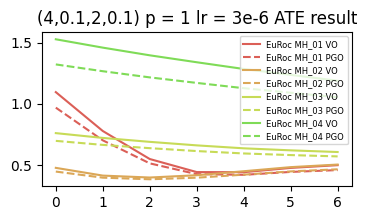

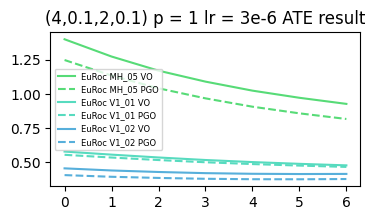

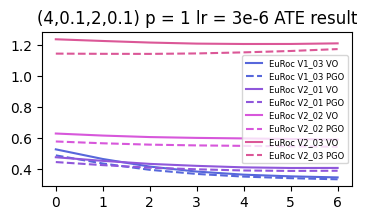

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a palette with 11 distinct colors
palette = sns.color_palette("hls", 11)


def plot_result_table(vo_result_table, pgo_result_table,title=None,start_idx = 0,end_idx =5):
    plt.figure(figsize=(4,2))
    for i in range(start_idx, end_idx):
        if vo_result_table[i,0] !=0 :
            label = f'EuRoc {euroc_data_title[i]}'
            # Use the color from the palette for this plot
            plt.plot(vo_result_table[i,:end_epoch], color=palette[i], label=label+ ' VO')
            plt.plot(pgo_result_table[i,:end_epoch], color=palette[i], label=label + ' PGO' , linestyle='--' )

    plt.legend(fontsize=6)
    plt.title(title)

title = f'{loss_weight} p = {train_portion} lr = {lr} ATE result'
plot_result_table(euroc_vo_result_table, euroc_pgo_result_table, title = title, start_idx = 0,end_idx =4)
plot_result_table(euroc_vo_result_table, euroc_pgo_result_table, title = title, start_idx = 4,end_idx =7)
plot_result_table(euroc_vo_result_table, euroc_pgo_result_table, title = title, start_idx = 7,end_idx =11)


## percentage values

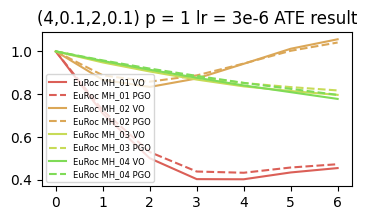

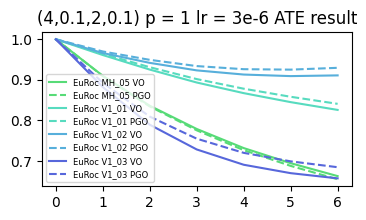

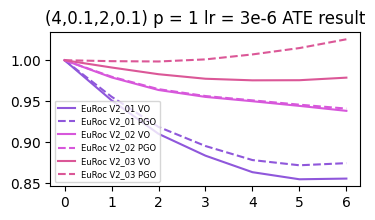

In [8]:
# euroc_vo_result_table.shape

euroc_vo_result_table_percent = euroc_vo_result_table
euroc_pgo_result_table_percent = euroc_pgo_result_table

end_traj = 11

for i in range(end_traj):
    try:
        euroc_vo_result_table_percent[i,:end_epoch] = euroc_vo_result_table[i,:end_epoch]/euroc_vo_result_table[i,0]
        euroc_pgo_result_table_percent[i,:end_epoch] = euroc_pgo_result_table[i,:end_epoch]/euroc_pgo_result_table[i,0]
    except Exception as e:
        print("An error occurred: ", e)

plot_result_table(euroc_vo_result_table_percent,euroc_pgo_result_table_percent, title = f'{loss_weight} p = {train_portion} lr = {lr} ATE result',start_idx = 0,end_idx =4)
plot_result_table(euroc_vo_result_table_percent,euroc_pgo_result_table_percent, title = f'{loss_weight} p = {train_portion} lr = {lr} ATE result',start_idx = 4,end_idx =8)
plot_result_table(euroc_vo_result_table_percent,euroc_pgo_result_table_percent, title = f'{loss_weight} p = {train_portion} lr = {lr} ATE result',start_idx = 8,end_idx =11)


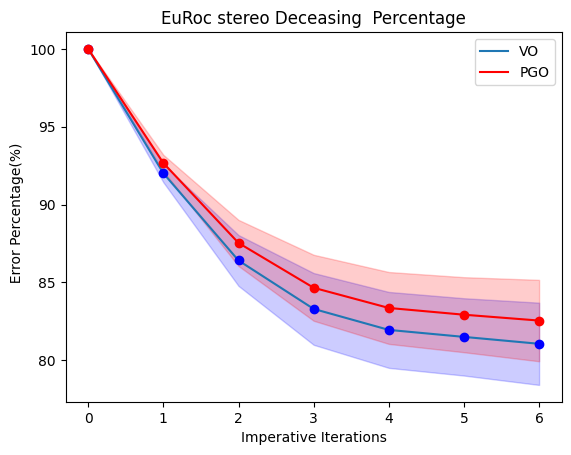

In [9]:
import numpy.ma as ma
masked_euroc_vo_result_table_plot = ma.masked_equal(euroc_vo_result_table_percent, 0)
masked_euroc_vo_result_table_plot = ma.masked_invalid(masked_euroc_vo_result_table_plot)

vo_mean = 100 * ma.mean(masked_euroc_vo_result_table_plot, axis=0)[:end_epoch]
vo_variance  = 100 * ma.var(masked_euroc_vo_result_table_plot, axis=0)[:end_epoch]

plt.plot(vo_mean,label = 'VO')
plt.plot(vo_mean,'bo')

plt.fill_between(range(len(vo_mean)), vo_mean - vo_variance, vo_mean + vo_variance, alpha=0.2, color='b')

masked_table_plot = ma.masked_equal(euroc_pgo_result_table_percent, 0)
masked_table_plot = ma.masked_invalid(masked_table_plot)

pgo_mean = 100 * ma.mean(masked_table_plot, axis=0)[:end_epoch]
pgo_variance  =  100 * ma.var(masked_table_plot, axis=0)[:end_epoch]

plt.plot(pgo_mean,'r',label = 'PGO')
plt.plot(pgo_mean,'ro')
# Plot the variance as a shaded region
plt.fill_between(range(len(pgo_mean)), pgo_mean - pgo_variance, pgo_mean + pgo_variance, alpha=0.2, color='r')
plt.title(f'EuRoc {exp_type} Deceasing  Percentage') 
plt.xlabel('Imperative Iterations')
plt.ylabel(f'  Error Percentage(%)')
# Set the x-axis locator to display only integers
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.legend()
plt.show()

## save the percentage figure

In [10]:
prefix

'euroc_result_tables_1Ra_0.1ta_delayOptm_lr=3e-6_(4,0.1,2,0.1)_p1_stereo'

In [11]:
np.savez(f'euroc_percentage_{prefix}.npz', 
vo_mean = vo_mean, vo_variance = vo_variance, pgo_mean = pgo_mean, pgo_variance = pgo_variance)

## plot percentage figure

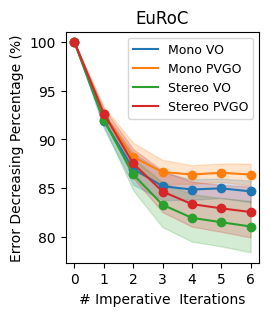

In [13]:
# Set the color cycle
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']


# mono_data = np.load('euroc_percentage_euroc_result_tables_1Ra_0.1ta_delayOptm_lr=3e-6_(1,0.1,10,0.1)_p1_mono.npz')
mono_data = np.load(f'euroc_percentage_euroc_result_tables_1Ra_0.1ta_delayOptm_lr={lr}_{loss_weight}_p{train_portion}_mono.npz')


vo_mean = mono_data['vo_mean'][:end_epoch]
vo_variance = mono_data['vo_variance'][:end_epoch]
pgo_mean = mono_data['pgo_mean'][:end_epoch]
pgo_variance = mono_data['pgo_variance'][:end_epoch]


i = 0
plt.figure(figsize=(2.5, 3))
plt.plot(vo_mean,label = 'Mono VO',color=color_cycle[i])
plt.plot(vo_mean,'o',color=color_cycle[i])

# Plot the variance as a shaded region
plt.fill_between(range(len(vo_mean)), vo_mean - vo_variance, vo_mean + vo_variance, alpha=0.2,color=color_cycle[i])

i += 1

plt.plot(pgo_mean,label = 'Mono PVGO',color=color_cycle[i])
plt.plot(pgo_mean,'o',color=color_cycle[i])
# Plot the variance as a shaded region
plt.fill_between(range(len(pgo_mean)), pgo_mean - pgo_variance, pgo_mean + pgo_variance, alpha=0.2,color=color_cycle[i])
plt.title(f'EuRoc {exp_type} Errors  Percentage') 
plt.xlabel('Impertive Iterations')
plt.ylabel(f'  Error Percentage(%)')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))

# stereo_data = np.load('euroc_percentage_euroc_result_tables_1Ra_0.1ta_delayOptm_lr=3e-6_(1,0.1,10,0.1)_p1_stereo.npz')
stereo_data = np.load(f'euroc_percentage_euroc_result_tables_1Ra_0.1ta_delayOptm_lr={lr}_{loss_weight}_p{train_portion}_stereo.npz')


vo_mean = stereo_data['vo_mean'][:end_epoch]
vo_variance = stereo_data['vo_variance'][:end_epoch]
pgo_mean = stereo_data['pgo_mean'][:end_epoch]
pgo_variance = stereo_data['pgo_variance'][:end_epoch]

i += 1
plt.plot(vo_mean,label = 'Stereo VO',color=color_cycle[i])
plt.plot(vo_mean,'o',color=color_cycle[i])
# Plot the variance as a shaded region
plt.fill_between(range(len(vo_mean)), vo_mean - vo_variance, vo_mean + vo_variance, alpha=0.2,color=color_cycle[i])

i += 1

# plt.subplots_adjust(left=0.1, right=0.9)
plt.plot(pgo_mean,label = 'Stereo PVGO',color=color_cycle[i])
plt.plot(pgo_mean,'o',color=color_cycle[i])
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
# plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

# Get the current axes
ax = plt.gca()
import matplotlib.ticker as ticker
# Set the tick locators and formatters for the x-axis
# ax.xaxis.set_major_locator(ticker.MultipleLocator(base=2))
# ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

# Set the tick locators and formatters for the y-axis
# ax.yaxis.set_major_locator(ticker.MultipleLocator(base=2))
# ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))

# Plot the variance as a shaded region
plt.fill_between(range(len(pgo_mean)), pgo_mean - pgo_variance, pgo_mean + pgo_variance, alpha=0.2,color=color_cycle[i])
plt.title(f'EuRoC') 
plt.xlabel('# Imperative  Iterations')
plt.ylabel(f'Error Decreasing Percentage (%)')

# plt.grid(which='major')

plt.legend(fontsize=9,loc='upper right')
# plt.legend(fontsize=10,loc='lower left')
# plt.legend()
plt.savefig('./exp_figures3/euroc_error_percentage_3.pdf', bbox_inches='tight', pad_inches=0.05)
# plt.show()



# plot trajectories

## exp1

save figure to ./exp_figures3/EuRoC_MH_04_stereo_legend.pdf


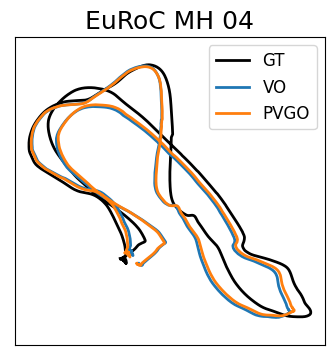

(0, 0)
(233.9, 0)
(0, 252.131875)
(233.9, 252.131875)
save figure to ./exp_figures3/EuRoC_MH_05_stereo_legend.pdf


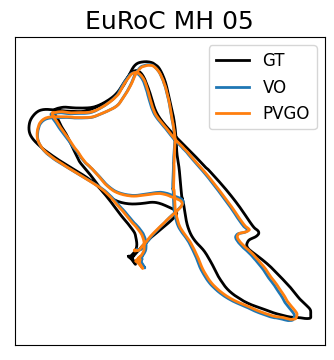

(0, 0)
(233.9, 0)
(0, 252.131875)
(233.9, 252.131875)
save figure to ./exp_figures3/EuRoC_V1_02_stereo_legend.pdf


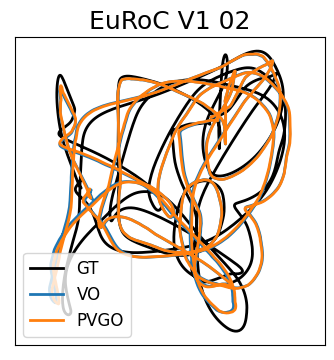

(0, 0)
(233.9, 0)
(0, 252.131875)
(233.9, 252.131875)
save figure to ./exp_figures3/EuRoC_V1_03_stereo_legend.pdf


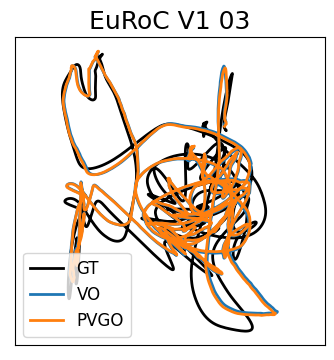

(0, 0)
(233.9, 0)
(0, 252.131875)
(233.9, 252.131875)


In [14]:
import pypose as pp
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12

# Create a color map with varying intensities
num_trajectories  = end_epoch
colors = plt.cm.Blues(np.linspace(0.2, 1, num_trajectories))

save_traj = [3,4,6,7]
# save_traj = np.linspace(0,10,11).astype(int)

traj_types = ['VO','PGO']
# traj_types = ['PGO']

fig_size = 4
lw = 2

for traj_id in save_traj:
    fig = plt.figure(figsize=(fig_size, fig_size))
    gt_aligned = trajectories_data[traj_id][0]['gt_aligned']

    plt.plot(gt_aligned[:, 0], gt_aligned[:, 1],
                        c='k', 
                        label='GT', 
                        # label='Ground Truth', 
                        linewidth=lw)

    epoch_id = end_epoch - 1
    try:
        vo_est_aligned = trajectories_data[traj_id][epoch_id]['vo_est_aligned']
        pgo_est_aligned = trajectories_data[traj_id][epoch_id]['pgo_est_aligned']
        
        '''
        vo_est_aligned = pp.SE3(trajectories_data[traj_id][epoch_id]['vo_est_aligned'])
        pgo_est_aligned = pp.SE3(trajectories_data[traj_id][epoch_id]['pgo_est_aligned'])
        vo_est_aligned = vo_est_aligned[0].Inv() * vo_est_aligned
        pgo_est_aligned = pgo_est_aligned[0].Inv() *  pgo_est_aligned
        '''

        # if traj_type == 'VO':
        plt.plot(vo_est_aligned[:, 0], vo_est_aligned[:, 1],
                label=f'VO', linewidth=lw)
        
        # elif traj_type == 'PGO':
        plt.plot(pgo_est_aligned[:, 0], pgo_est_aligned[:, 1],
                label=f'PVGO', linewidth=lw)
    
    except Exception as e:
        print("An error occurred: ", e)

    # plt.plot(gt_aligned[0, 0], gt_aligned[0, 1],
    #             'o', label='start')

    plt.axis('equal')
    # plt.xlabel('x (m)')
    # plt.ylabel('y (m)')
    # plt.grid(True)

    add_legend = True
    if add_legend:
        # plt.legend(loc='lower left')
        plt.legend()
    
    traj_id_str = str(traj_id).zfill(2)
    title = f'EuRoC {euroc_data_title[traj_id]}'
    title = title.replace('_',' ')
    
    savefigname = f'EuRoC_{euroc_data_title[traj_id]}_{exp_type}'

    plt.title(title,fontsize=18)
    
    plt.xticks([])
    plt.yticks([])

    plt.gca().set_aspect('equal')

    title = title.replace(' ','_')

    old_savefigname = savefigname
    if add_legend:
        savefigname = './exp_figures3/' + savefigname +'_legend' + '.pdf'
    else:
        savefigname = './exp_figures3/' + savefigname + '.pdf'
    
    print(f'save figure to {savefigname}')

    save_fig = True
    if savefigname is not None and save_fig:
        plt.savefig(savefigname, bbox_inches='tight', pad_inches=0.05)
        # plt.savefig(savefigname , pad_inches=0.05)
    vis = True
    if vis:
        plt.show()
    plt.close(fig)

    # corp to the required size
    from PyPDF2 import PdfWriter, PdfReader, PdfMerger
    reader = PdfReader(savefigname)
    writer = PdfWriter()

    page = reader.pages[0]
    print(page.cropbox.lower_left)
    print(page.cropbox.lower_right)
    print(page.cropbox.upper_left)
    print(page.cropbox.upper_right)

    for page in reader.pages:
        page.cropbox.upper_left = (4,4)
        page.cropbox.lower_right = page.cropbox.upper_right
        writer.add_page(page) 
    
    with open('./exp_figures3/' + old_savefigname +'_legend_crop' + '.pdf','wb') as fp:
        writer.write(fp) 

## exp2

save figure to exp_figures3/EuRoC_MH_01_stereo_VO_legend.pdf


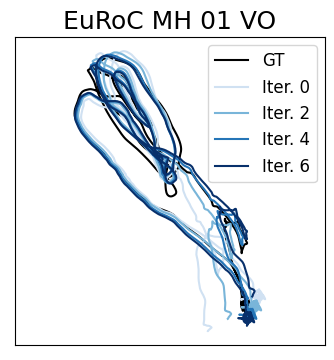

(0, 0)
(233.9, 0)
(0, 252.131875)
(233.9, 252.131875)
save figure to ./exp_figures3/EuRoC_MH_01_stereo_VO_legend_crop.pdf
save figure to exp_figures3/EuRoC_MH_03_stereo_VO_legend.pdf


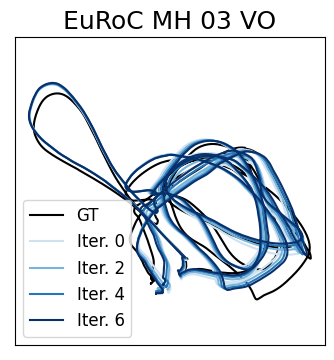

(0, 0)
(233.9, 0)
(0, 252.131875)
(233.9, 252.131875)
save figure to ./exp_figures3/EuRoC_MH_03_stereo_VO_legend_crop.pdf
save figure to exp_figures3/EuRoC_MH_04_stereo_VO_legend.pdf


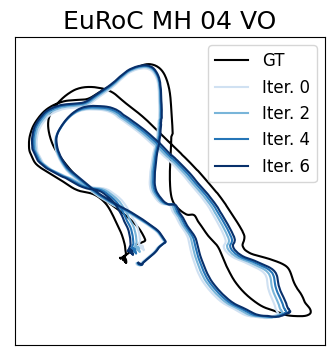

(0, 0)
(233.9, 0)
(0, 252.131875)
(233.9, 252.131875)
save figure to ./exp_figures3/EuRoC_MH_04_stereo_VO_legend_crop.pdf
save figure to exp_figures3/EuRoC_MH_05_stereo_VO_legend.pdf


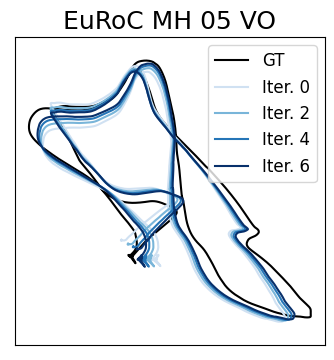

(0, 0)
(233.9, 0)
(0, 252.131875)
(233.9, 252.131875)
save figure to ./exp_figures3/EuRoC_MH_05_stereo_VO_legend_crop.pdf
save figure to exp_figures3/EuRoC_V1_01_stereo_VO_legend.pdf


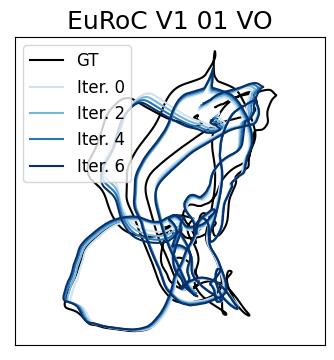

(0, 0)
(233.9, 0)
(0, 252.131875)
(233.9, 252.131875)
save figure to ./exp_figures3/EuRoC_V1_01_stereo_VO_legend_crop.pdf
save figure to exp_figures3/EuRoC_V1_02_stereo_VO_legend.pdf


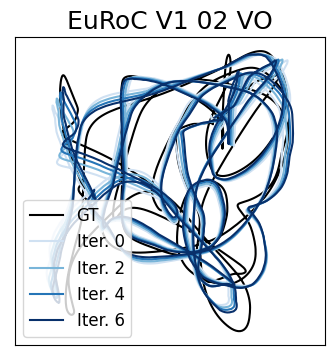

(0, 0)
(233.9, 0)
(0, 252.131875)
(233.9, 252.131875)
save figure to ./exp_figures3/EuRoC_V1_02_stereo_VO_legend_crop.pdf


In [16]:
vis = True
# fig = plt.figure(figsize=(5, 5))
# cm = plt.cm.get_cmap('Spectral')

import pypose as pp
import numpy as np
import matplotlib.pyplot as plt
# plt.switch_backend("pdf")
plt.rcParams['font.size'] = 12
# traj_id = 0
# epoch_id = 0

# Create a color map with varying intensities
num_trajectories  = end_epoch
colors = plt.cm.Blues(np.linspace(0.2, 1, num_trajectories))

save_traj = [0,2,3,4,5,6]
# save_traj = np.linspace(0,10,11).astype(int)

# traj_types = ['VO','PGO']
traj_types = ['VO']

# for traj_id in range(5,6):
# for traj_id in range(8,9):
# for traj_id in range(plot_id,plot_id+1):

fig_size = 4
for traj_id in save_traj:
    for traj_type in traj_types:

        # plt.subplot(111)
        fig = plt.figure(figsize=(fig_size, fig_size))
        gt_aligned = trajectories_data[traj_id][0]['gt_aligned']

        plt.plot(gt_aligned[:, 0], gt_aligned[:, 1],
                            c='k', label='GT')
        for epoch_id in range(0,end_epoch,2):
        # for epoch_id in range(0,10):
            try:
                vo_est_aligned = trajectories_data[traj_id][epoch_id]['vo_est_aligned']
                pgo_est_aligned = trajectories_data[traj_id][epoch_id]['pgo_est_aligned']
                
                '''
                vo_est_aligned = pp.SE3(trajectories_data[traj_id][epoch_id]['vo_est_aligned'])
                pgo_est_aligned = pp.SE3(trajectories_data[traj_id][epoch_id]['pgo_est_aligned'])
                vo_est_aligned = vo_est_aligned[0].Inv() * vo_est_aligned
                pgo_est_aligned = pgo_est_aligned[0].Inv() *  pgo_est_aligned
                '''

                # plt.plot(gt_aligned[0, 0], gt_aligned[0, 1],
                #             'ko', label='Ground Truth start')

                if traj_type == 'VO':
                    plt.plot(vo_est_aligned[:, 0], vo_est_aligned[:, 1],
                            label=f'Iter. {epoch_id}', color=colors[epoch_id])
                
                elif traj_type == 'PGO':
                    plt.plot(pgo_est_aligned[:, 0], pgo_est_aligned[:, 1],
                            # linestyle='dashed', 
                            color=colors[epoch_id],
                            label=f'Iter. {epoch_id}')
                
                # x = vo_est_aligned[:, 0]
                # y = vo_est_aligned[:, 1]

            except:
                pass

        plt.axis('equal')

        # Set the aspect ratio to 'equal'
        plt.gca().set_aspect('equal')

        plt.legend()
        
        traj_id_str = str(traj_id).zfill(2)

        title = f'EuRoC {euroc_data_title[traj_id]} {traj_type}'
        title = title.replace('_',' ')

        savefigname = f'EuRoC_{euroc_data_title[traj_id]}_{exp_type} {traj_type}'

        plt.title(title,fontsize=18)

        plt.xticks([])
        plt.yticks([])

        savefigname = savefigname.replace(' ','_')
        old_savefigname = savefigname
        savefigname = 'exp_figures3/' + savefigname +'_legend' + '.pdf'
        print(f'save figure to {savefigname}')
        
        
        save_fig = True
        if savefigname is not None and save_fig:
            plt.savefig(savefigname, format = 'pdf' ,bbox_inches='tight', pad_inches=0.05)
            # plt.savefig(savefigname)
        if vis:
            plt.show()
        plt.close(fig)


        from PyPDF2 import PdfWriter, PdfReader, PdfMerger
        reader = PdfReader(savefigname)
        writer = PdfWriter()

        page = reader.pages[0]
        print(page.cropbox.lower_left)
        print(page.cropbox.lower_right)
        print(page.cropbox.upper_left)
        print(page.cropbox.upper_right)

        for page in reader.pages:
            page.cropbox.upper_left = (4,4)
            page.cropbox.lower_right = page.cropbox.upper_right
            writer.add_page(page) 
        
        crop_figname = './exp_figures3/' + old_savefigname +'_legend_crop' + '.pdf'
        print(f'save figure to {crop_figname}')
        with open(crop_figname,'wb') as fp:
            writer.write(fp) 